Accuracy: 0.5


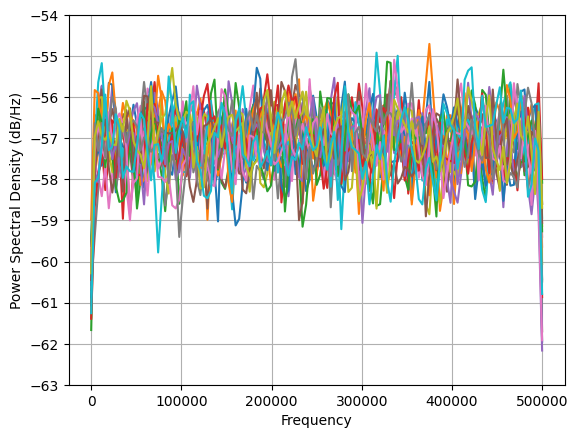

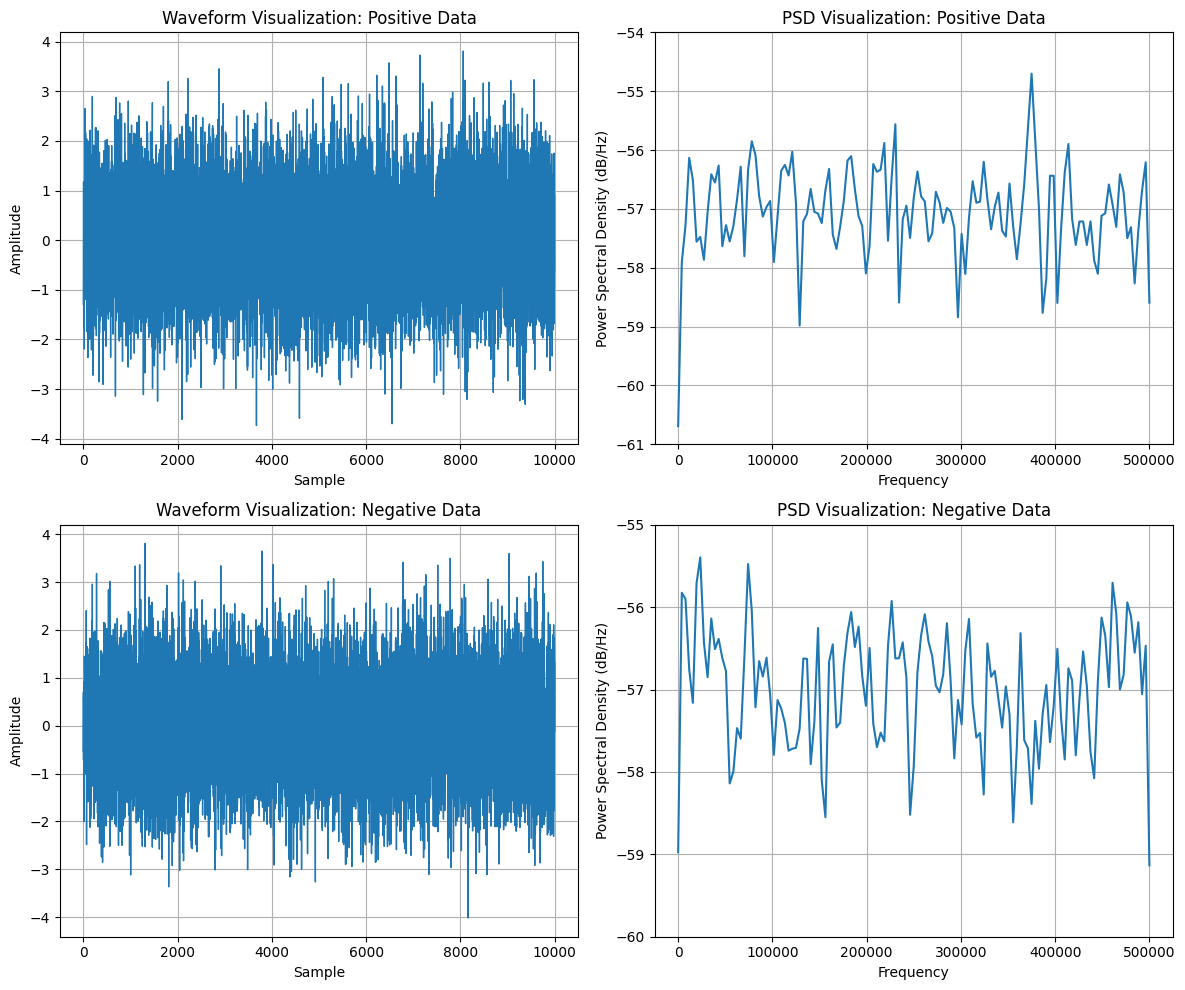

In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load and process data from binary files
def load_binary_file(file_name):
    with open(file_name, 'rb') as f:
        data = np.fromfile(f, dtype=np.float32)
    return data

# Calculate Power Spectral Density (PSD) as a feature
def calculate_psd(signal, sample_rate):
    f, psd = plt.psd(signal, NFFT=256, Fs=sample_rate)
    return psd

# Simulation parameters
sample_rate = 1000000  # 1 MHz sample rate

# Load positive (object detected) and negative (no object detected) data
positive_data = [load_binary_file(f'positive_data_{i}.dat') for i in range(10)]
negative_data = [load_binary_file(f'negative_data_{i}.dat') for i in range(10)]

# Create labels: 1 for positive class, 0 for negative class
labels = np.concatenate((np.ones(10), np.zeros(10)))

# Calculate PSD features for positive and negative data
positive_features = [calculate_psd(signal, sample_rate) for signal in positive_data]
negative_features = [calculate_psd(signal, sample_rate) for signal in negative_data]

# Concatenate positive and negative features for SVM
all_features = np.concatenate((positive_features, negative_features))

# Split features and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(all_features, labels, test_size=0.1, random_state=42)

# Create and train an SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Visualize the data for positive and negative samples
plt.figure(figsize=(12, 10))

# Plot waveform for positive data sample
plt.subplot(2, 2, 1)
plt.plot(positive_data[1], lw=1)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform Visualization: Positive Data')
plt.grid()

# Plot PSD for positive data sample
plt.subplot(2, 2, 2)
calculate_psd(positive_data[1], sample_rate)
plt.title('PSD Visualization: Positive Data')

# Plot waveform for negative data sample
plt.subplot(2, 2, 3)
plt.plot(negative_data[1], lw=1)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform Visualization: Negative Data')
plt.grid()

# Plot PSD for negative data sample
plt.subplot(2, 2, 4)
calculate_psd(negative_data[1], sample_rate)
plt.title('PSD Visualization: Negative Data')

plt.tight_layout()
plt.show()
